In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [13]:
# Read in data
df_clustered = pd.read_csv("Clustered Data.csv")
df = pd.read_csv("Prepared Data.csv")
df['Cluster'] = df_clustered['cluster']

Look at some descriptive stats for the clusters:

In [ ]:
# Proportional size of each cluster
df['Cluster'].value_counts(normalize=True)


Cluster
2    0.345176
0    0.332770
1    0.207205
3    0.114849
Name: proportion, dtype: float64

In [ ]:
# Mean values for the numerical categories
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
display(cluster_summary)

,Id,User_id,MemberAge,LengthOfStayInMonths,IMD10,VisitsPerMonth
Cluster,,,,,,
0,2.781078e+06,3.829605e+06,20.322436,6.412344,5.012962,4.184625
1,2.435662e+06,3.025563e+06,44.945189,12.369146,4.898675,3.987812
2,2.517198e+06,3.267543e+06,32.023316,9.328994,4.586742,4.133696
3,2.328831e+06,2.828225e+06,62.555265,16.399072,5.563613,3.911890


The ALOS appears to be quite different across the groups. Member Age also clearly quite different. However, IMD and Visits Per Month do not appear to be a big point of difference.

In [15]:
pd.crosstab(df['Cluster'], df['UsageType'], normalize='index')


UsageType,Fitness Class,Gym,Mixed,Other,Swim
Cluster,,,,,
0,0.036611,0.764866,0.046633,0.049135,0.102756
1,0.135635,0.513877,0.076490,0.041594,0.232404
2,0.099979,0.627967,0.069403,0.034839,0.167811
3,0.198787,0.440654,0.063442,0.039769,0.257349


Cluster 0 is the biggest gym-using. Swim is bigger in clusters 1 and 3. Cluster 2 is a bit of a mix of both. Cluster 3 is the biggest fitness class using cluster.

In [16]:
pd.crosstab(df['Cluster'], df['Gender'], normalize='index')

Gender,Female,Male,Non Binary,Not Given
Cluster,,,,
0,0.442557,0.546421,0.000010,0.011012
1,0.520157,0.466002,0.000016,0.013825
2,0.515502,0.467563,0.000043,0.016893
3,0.563171,0.427711,0.000029,0.009090


Cluster 0 is more Men. Clusters 1 and 2 more mixed. Cluster 3 more female.

In [17]:
pd.crosstab(df['Cluster'], df['DiscountType'], normalize='index')

DiscountType,Carer,Concessionary,Corporate,Disability,GP Referral,GSF,No Discount,Senior,Student
Cluster,,,,,,,,,
0,0.000281,0.023531,0.023994,0.016075,0.002630,0.000286,0.623873,0.000217,0.309115
1,0.003290,0.047685,0.106450,0.048934,0.037521,0.000055,0.718211,0.001123,0.036730
2,0.001771,0.026217,0.105059,0.025648,0.011974,0.000190,0.727196,0.000271,0.101674
3,0.002112,0.037300,0.077797,0.066338,0.094991,0.000114,0.555822,0.156293,0.009232


Cluster 0 has a strong Student skew. Cluster 3 has a strong Senior skew. This makes sense with the Age profile above. Clusters 1 and 2 are more on the 'No discount' group but also higher on Corporate. Cluster 2 has slightly more student discounts included.

In [18]:
pd.crosstab(df['Cluster'], df['output_area_classification_supergroup'], normalize='index')

output_area_classification_supergroup,Constrained city dwellers,Cosmopolitans,Ethnicity central,Hard-pressed living,Multicultural metropolitans,Rural residents,Suburbanites,Urbanites
Cluster,,,,,,,,
0,0.027091,0.120229,0.243817,0.065781,0.273223,0.046633,0.095452,0.127774
1,0.028394,0.091517,0.309724,0.066216,0.259620,0.045470,0.079638,0.119421
2,0.025989,0.147410,0.373960,0.051699,0.226883,0.031022,0.049387,0.093650
3,0.028539,0.075599,0.244321,0.064826,0.216638,0.080979,0.133447,0.155651


No great points of difference here. Cluster 3 has a skew towards Rural Residents or Suburbanites. Cluster 2 is more Cosmopolitan.

In [19]:
pd.crosstab(df['Cluster'], df['MembershipScope'], normalize='index')

MembershipScope,Centre,National,Other,Partnership
Cluster,,,,
0,0.383519,0.150226,0.078093,0.388163
1,0.544201,0.114478,0.154222,0.187100
2,0.594120,0.125612,0.116131,0.164136
3,0.471190,0.093236,0.205123,0.230451


Cluster 0 skewed towards Partnership use. Clusters 1 and 2 towards Centre memberships.

In [20]:
pd.crosstab(df['Cluster'], df['Ethnicity'], normalize='index')

Ethnicity,"Asian, Asian British or Asian Welsh","Black, Black British, Black Welsh, Caribbean or African",Mixed or Multiple ethnic groups,Not Given,Other ethnic group,White
Cluster,,,,,,
0,0.174801,0.089375,0.049189,0.167606,0.040467,0.478562
1,0.128991,0.081085,0.026575,0.256155,0.033171,0.474022
2,0.143825,0.075618,0.036900,0.207664,0.032489,0.503504
3,0.071818,0.082206,0.014498,0.300656,0.024101,0.506721


Cluster 0 more Asian. Cluster 1 also high non-white but mostly due to Not Given. Cluster 2 and 3 are most White.

In [22]:
pd.crosstab(df['Cluster'], df['Membership'], normalize='index').transpose()

Cluster,0,1,2,3
Membership,,,,
Better GP Referral,0.000000,0.000032,0.000005,0.000243
Better Golf,0.000015,0.000047,0.000057,0.000128
Better HF GP Referral,0.003339,0.045707,0.014590,0.113470
Better Health Centre,0.279748,0.485704,0.529541,0.430565
Better Health Centre Junior,0.048430,0.000799,0.000119,0.000143
Better Health Corporate,0.032134,0.112667,0.112423,0.080965
Better Health Partnership,0.032144,0.135951,0.108079,0.189997
Better Health Partnership Junior,0.228245,0.004239,0.000978,0.001056
Better Health Region,0.006762,0.002412,0.002887,0.002055


Cluster 0 - High: Junior, Student. Low: Corporate, Standard Centre/Partnership, Swim, Referral

Cluster 1 - High: Corporate, BH Partnership and Centre. Low: Student

Cluster 2 - High: BH Centre, Corporate, ~Student. Low: Referral

Cluster 3 - High: Referral, Partnership. Low: Student, Junior

Compare Length of Stay Across Clusters

In [24]:
df.groupby('Cluster')['LengthOfStayInMonths'].agg(['mean', 'std', 'count'])


,mean,std,count
Cluster,,,
0,6.412344,7.297720,203054
1,12.369146,18.807440,126435
2,9.328994,12.192856,210624
3,16.399072,25.800937,70080


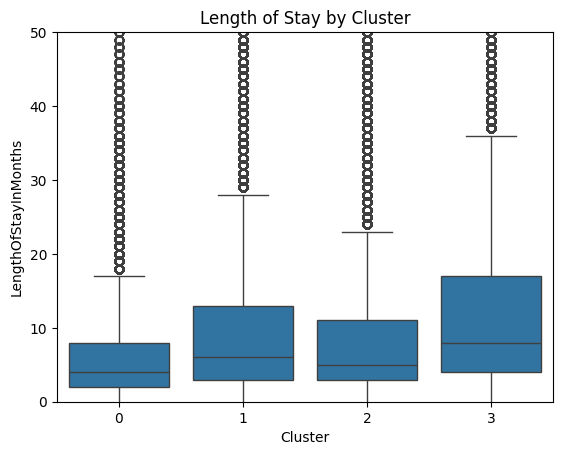

In [29]:
sns.boxplot(x='Cluster', y='LengthOfStayInMonths', data=df)
plt.ylim(0, 50)
plt.title('Length of Stay by Cluster')
plt.show()

Cluster 0 has a small SD and a low mean, suggesting short stays.

Cluster 1 has a higher ALOS but also higher variation.

Cluster 2 has a slightly lower ALOS and a smaller SD.

Cluster 3 has the highest ALOS but also the highest spread.

Test for Statistical Significance

In [28]:
grouped = [group['LengthOfStayInMonths'].dropna() for _, group in df.groupby('Cluster')]
f_stat, p_value = f_oneway(*grouped)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

ANOVA F-statistic: 9542.73, p-value: 0.0000


Low p-value implies statistically significant ALOSs between groups.

Cluster 0 - Young people and students. Shortest ALOS. Likely to be on discounted membership. Average Age 20, ALOS 6 months. Skews towards Male and gym-focussed.

Cluster 1 - Older Millenials and Gen X. ALOS 12 months. Average age 45. More likely on standard memberships or corporate. Bigger skew towards swim and fitness classes. Mixed gender group.

Cluster 2 - Millenials. ALOS 9 months. Average age 32. Some Students and more cosmopolitan. Skews slightly towards White and gym as main usage. Mostly not discounted.

Cluster 3 - Baby Boomer Generation. Average age 63. ALOS 16. Likely to be on Senior or Referral Discount. Usage skewed towards swim and fitness classes. More female and white compared to other groups.